# K-Means Clustering

In [9]:
import numpy as np
import matplotlib.pyplot as plt
print("Libraries imported")

Libraries imported


## Model Architecture

K-means clustering is a popular unsupervised machine learning algorithm used to group similar data points together. The algorithm works by first randomly selecting K centroids, where K is the number of clusters we want to identify. Then, each data point is assigned to the nearest centroid, and the mean of all the data points assigned to each centroid is calculated. This mean becomes the new centroid for that cluster. This process is repeated until the centroids no longer move or a maximum number of iterations is reached.

The mathematical formulas used in the K-means algorithm are as follows:

1. Randomly initialize K centroids: $c_1, c_2, ..., c_k$
2. Assign each data point $x_i$ to the closest centroid: $argmin_j ||x_i - c_j||^2$
3. Update each centroid $c_j$ to be the mean of all data points assigned to it: $c_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i$
4. Repeat steps 2 and 3 until the centroids no longer move or a maximum number of iterations is reached.

Here, $||x_i - c_j||^2$ represents the Euclidean distance between data point $x_i$ and centroid $c_j$, and $S_j$ represents the set of all data points assigned to centroid $c_j$.

### Inertia (Within-Cluster Sum of Squared Errors)

$$\sum_{i=1}^{n} \min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

Where:
- $n$ is the number of data points
- $C$ is the set of K clusters
- $\mu_j$ is the centroid of cluster $j$
- $x_i$ is the $i$th data point

The inertia is the sum of squared distances between each data point and its assigned centroid. The goal of the K-means algorithm is to minimize the inertia by finding the optimal cluster centroids.

In [10]:
class KMeans:
    """
    K-means clustering algorithm.

    Parameters:
    -----------
    k: int
        The number of clusters to form.
    max_iters: int, default=100
        The maximum number of iterations to run the algorithm.

    Attributes:
    -----------
    k: int
        The number of clusters.
    max_iters: int
        The maximum number of iterations.
    centroids: numpy.ndarray
        The centroids of the clusters.
    labels: list
        The cluster labels for each data point.
    inertia: float
        The sum of squared distances of samples to their closest cluster center.

    Methods:
    --------
    fit(X: numpy.ndarray) -> None
        Compute k-means clustering.
    predict(X: numpy.ndarray) -> list
        Predict the closest cluster each sample in X belongs to.

    """

    def __init__(self, k: int, max_iters: int = 100) -> None:
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None
        self.inertia = None


    def fit(self, X: np.ndarray) -> None:
        """
        Compute k-means clustering.

        Parameters:
        -----------
        X: numpy.ndarray
            The input data.

        Returns:
        --------
        None
        """
        # Randomly initialize k centroids
        self.centroids = X[np.random.choice(a=X.shape[0], size=self.k, replace=False)]

        for i in range(self.max_iters):
            self.inertia = 0
            assigned_clusters = []
            new_centroids = []

            # Assign each data point to the closest centroid
            for x in X:
                distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
                assigned_clusters.append(np.argmin(distances))

            # Update centroids to be the average of all points belonging to the particular cluster
            for k in range(self.k):
                k_cluster_data = X[np.array(assigned_clusters) == k]
                new_centroids.append(np.mean(k_cluster_data, axis=0))

                for x in k_cluster_data:
                    self.inertia += np.sum((x - self.centroids[k])**2)

            # Check if the centroids have converged
            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels = assigned_clusters

    def predict(self, X: np.ndarray) -> list:
        """
        Predict the closest cluster each sample in X belongs to.

        Parameters:
        -----------
        X: numpy.ndarray
            The input data.

        Returns:
        --------
        list
            The predicted cluster labels for each data point.
        """
        predictions = []
        for x in X:
            distances = np.sqrt(np.sum((x - self.centroids)**2, axis=1))
            predictions.append(np.argmin(distances))
        return predictions
                

## Dataset

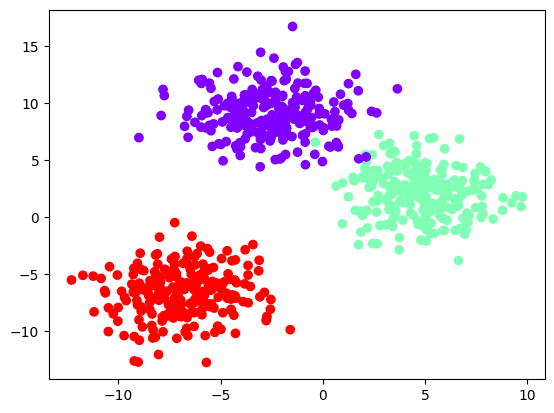

In [11]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate data
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=42, cluster_std=2)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='rainbow')


In [12]:
# for 3D plot
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # Specify 3D projection

# ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap='rainbow') 

## Model Training

In [13]:
kmeans = KMeans(k=3)
kmeans.fit(X)
print(kmeans.labels)

[1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 1, 0, 1, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 

## Model Evaluation

In [14]:
from sklearn.metrics import silhouette_score
preds = kmeans.predict(X_test)
inertia = kmeans.inertia
sil_score = silhouette_score(X_test, preds)
print("Inertia: ", inertia)
print("Silhouette Score: ", sil_score)

Inertia:  7727.112280523751
Silhouette Score:  0.6961476529789709


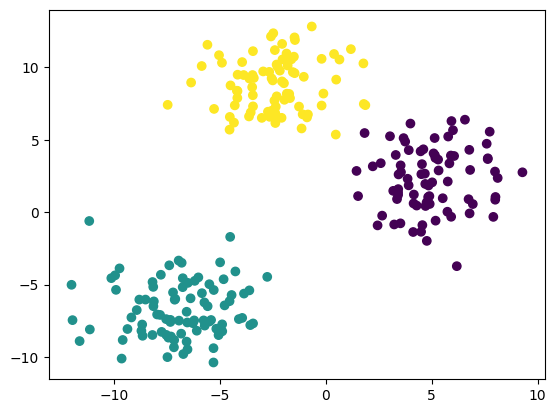

In [15]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds)

## K-Elbow Method

The K-Elbow method is a technique used to determine the optimal number of clusters in a dataset. It works by plotting the within-cluster sum of squares (inertia) against the number of clusters. The "elbow" point in the plot represents the number of clusters where adding another cluster does not significantly improve the fit of the model. This point is considered the optimal number of clusters for the dataset.

Text(0, 0.5, 'Inertia')

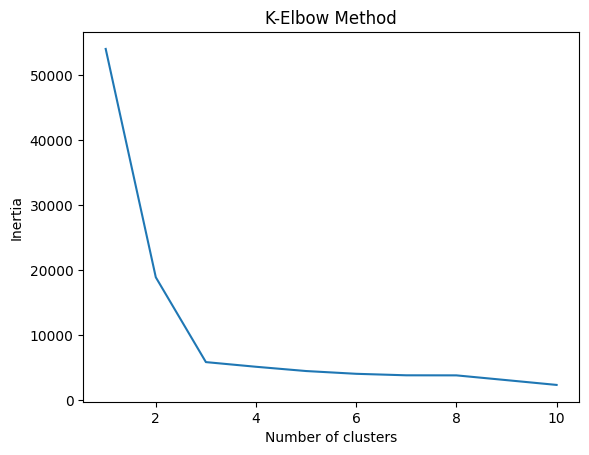

In [16]:
inertias = []
max_k = 10

for k in range(1, max_k + 1):
    kmeans = KMeans(k=k)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia)

plt.plot(range(1, max_k+1), inertias)
plt.title('K-Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

according to the elbow method, the optimal number of clusters is 3